### 라이브러리 호출

In [26]:
from ckonlpy.tag import Twitter
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

### Train data 호출

#### 2015년 전체 data

In [42]:
train_data2=pd.read_csv('2015.csv',encoding='utf-8')
train_data2.head()

,title,date,content,url
0,"[Hot-Line] “AJ렌터카, 현 주가는 저평가 수준”",2015.12.28. 오전 8:41,유진투자증권은 28일 AJ렌터카에 대해 최근 급격히 하락한 주가로 저평가 국면에 진...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,"AJ렌터카, 美 금리 인상 우려 과도 ‘매수’",2015.12.29. 오전 10:57,유진투자증권은 AJ렌터카에 대해 28일 “미국 금리인상에 따른 주가 하락의 영향은 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,"[특징주]AJ렌터카, '절대 저평가' 분석에 상승 전환",2015.12.28. 오전 9:39,[이데일리 이명철 기자] AJ렌터카(068400)가 미국 금리인상에 대한 우려가 과...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,"[인베스트조선][2016년 산업전망] 렌터카 시장, 신규플레이어 진출에도 빅4 체...",2015.12.30. 오전 7:00,카드사와 캐피탈사 렌터카 사업 진출 가속화\n한신평 “신규 진입자들의 영향 미미할 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"장기렌트카/자동차리스, 2016년 새해맞이! 장기렌트카 렌탈 서비스로 새 차 마...",2015.12.30. 오전 12:01,2015년이 채 이틀도 남지 않았다. 지속적인 경제 불황이 계속되고 있지만 장기렌트...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [3]:
train_data3=train_data2[:30000]

In [4]:
len(train_data3)

30000

#### 결측치 제거

In [6]:
train_data3=train_data3.dropna(how='any')

#### 기사 수

In [7]:
len(train_data3)

30000

#### 한글만 남게

In [8]:
train_data3['content']=train_data3['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',"")

**정규표현식** <br>
[0-9] = [0,1,2,3,4,5,6,7,8,9]
             [ㄱ-ㅎ]=[ㄱ,ㄴ,ㄷ,ㄹ,ㅁ,ㅂ,ㅅ,ㅇ,ㅈ,ㅊ,ㅋ,...]<br>
             \d = 숫자와 매치, [0-9]와 동일<br>
             \D = 숫자가 아닌 것과 매치, [^0-9]와 동일<br>
             이 때 []안에 ^사용할 경우 반대라는 의미를 가짐<br>
             예를들어 [^0-9] : 숫자가 아닌 문자만<br>

In [9]:
train_data3.head()

,title,date,content,url
0,"[Hot-Line] “AJ렌터카, 현 주가는 저평가 수준”",2015.12.28. 오전 8:41,유진투자증권은일렌터카에대해최근급격히하락한주가로저평가국면에진입했다며투자의견매수와목표주...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,"AJ렌터카, 美 금리 인상 우려 과도 ‘매수’",2015.12.29. 오전 10:57,유진투자증권은렌터카에대해일미국금리인상에따른주가하락의영향은미미할전망이라며투자의견매수목...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,"[특징주]AJ렌터카, '절대 저평가' 분석에 상승 전환",2015.12.28. 오전 9:39,이데일리이명철기자렌터카가미국금리인상에대한우려가과도하고렌터카사업에대한정책지원기대감으로...,https://news.naver.com/main/read.nhn?mode=LSD&...
3,"[인베스트조선][2016년 산업전망] 렌터카 시장, 신규플레이어 진출에도 빅4 체...",2015.12.30. 오전 7:00,카드사와캐피탈사렌터카사업진출가속화한신평신규진입자들의영향미미할것강중체제굳어질듯카드사와...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,"장기렌트카/자동차리스, 2016년 새해맞이! 장기렌트카 렌탈 서비스로 새 차 마...",2015.12.30. 오전 12:01,년이채이틀도남지않았다지속적인경제불황이계속되고있지만장기렌트카시장만큼은활기를띠고있다신차...,https://news.naver.com/main/read.nhn?mode=LSD&...


#### 불용어 정의

In [10]:
stopwords = ['의','가','하다','이','은','들','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#### 형태소 분석기

In [11]:
twitter=Twitter()
tokenized_data3=[]
for sentence in train_data3['content']:
    tmpx=twitter.morphs(sentence,stem=True)
    tmpx=[word for word in tmpx if not word in stopwords]
    tokenized_data3.append(tmpx)

D:\00.dev\Anaconda\envs\team3-py38\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


twitter.morphs > 형태소 추출 <br>
twitter.nouns > 명사 추출 <br>
twitter.pos > 품사 태깅 - 주어진 텍스트를 형태소 단위로 나누고 나눠진 형태소를 그에 해당하는 품사와 함께 리스트화<br>
stem은 각 단어에서 어간을 추출하는 기능 <br>
EX) 와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔, stem = True <br>
['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔'] <br>
이런 => 이렇다 , 만드는 => 만들다 와 같이 일정수준의 정규화를 진행해준다.

#### 기사 분석

기사의 최대 길이: 5642
기사의 평균 길이: 325.5822


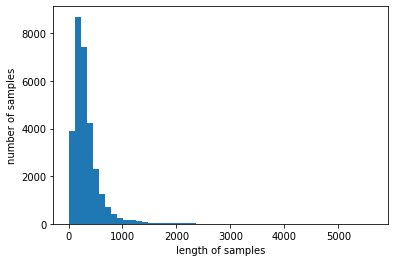

In [12]:
print('기사의 최대 길이:', max(len(l) for l in tokenized_data3))
print('기사의 평균 길이:', sum(len(l) for l in tokenized_data3)/len(tokenized_data3))
plt.hist([len(s) for s in tokenized_data3], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### Word2Vec

In [13]:
wv_model3= Word2Vec(sentences = tokenized_data3, size = 100, window=5, min_count = 5, workers = 4, sg=0)

size : 포스태깅된 컨텐츠를 100차원의 벡터로 바꿔라<br>
window : 주변단어는 앞뒤로 5개까지 보되,<br>
min_count : 코퍼스 내 출현 빈도가 5번 미만인 단어는 분석에서 제외해라<br>
workers : CPU는 쿼드코어를 써라<br>
sg : 분석 방법은 CBOW를 사용해라 (0=CBOW, 1=skipgram) <br>
iter : 만약 100번 학습하려면 iter=100 추가!

In [14]:
wv_model3.wv.vectors.shape    # 완성된 임베딩 매트릭스의 크기 확인

(39387, 100)

most_similar : gensim 패키지가 제공하는 기능 중 하나로, 두 벡터 사이의 코사인 유사도를 구해줌. 그 값이 클수록 비슷한 단어라는 뜻임 <br>
similarity : 두 단어의 유사도 계산

In [15]:
print(wv_model3.wv.most_similar('부도'))

[('신심', 0.6348377466201782), ('부결', 0.6176692247390747), ('부가', 0.609546422958374), ('부와', 0.5658515691757202), ('건문제', 0.5429770946502686), ('부등', 0.533054769039154), ('러곳', 0.5279779434204102), ('의과', 0.5179455876350403), ('도참', 0.5105744004249573), ('항소', 0.5088995695114136)]


In [16]:
print(wv_model3.wv.most_similar('상장폐지'))

[('종결', 0.6551148295402527), ('자진', 0.648735523223877), ('파산신청', 0.6478461027145386), ('기각', 0.6426689028739929), ('주주명부', 0.6235687732696533), ('출자전환', 0.6180136203765869), ('이의신청', 0.61468106508255), ('잔금', 0.6023138761520386), ('공동관리', 0.5898036360740662), ('가처분', 0.5848000049591064)]


아래는 '부도'라는 단어와 가장 비슷한(코사인 유사도가 큰) 10개 단어를 출력하라는 지시

In [45]:
print(wv_model3.wv.most_similar(positive=['부도'],topn=10))

[('신심', 0.6348377466201782), ('부결', 0.6176692247390747), ('부가', 0.609546422958374), ('부와', 0.5658515691757202), ('건문제', 0.5429770946502686), ('부등', 0.533054769039154), ('러곳', 0.5279779434204102), ('의과', 0.5179455876350403), ('도참', 0.5105744004249573), ('항소', 0.5088995695114136)]


**아래와 같이 학습하지 않은 단어에 대해서는 유사단어를 찾지 못함<br>
=> FastText를 사용한다면 해결 가능**

In [18]:
print(wv_model3.wv.most_similar(positive=['폭망'],topn=50))

KeyError: "word '폭망' not in vocabulary"

### FastText

FastText <br>
단어를 n-gram으로 학습 <br>
학습하지 않은 단어들도 subword(내부단어)를 이용해 학습 가능 <br>
보통 음절단위로 2에서 6 gram으로 , 예를들면 (대한,한민,민국,대한민,한민국,대한민국) 학습하지만 오탈자에서 강해지기 위해 6에서12 gram으로 자소단위로 학습시킴 <br>
내부단어 임베딩 <br>
내부단어도 모두 별개로 단일 벡터로 이루어짐 <br>


In [19]:
from gensim.models import FastText
ft_model3=FastText(sentences=tokenized_data3, size=100, window=5, min_count=5, workers=4, sg=0)

In [20]:
print(ft_model3.most_similar('부도'))

<ipython-input-20-77e733b1efd7>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  print(ft_model3.most_similar('부도'))


[('부와', 0.631125807762146), ('부결', 0.6220716834068298), ('부가', 0.5993314981460571), ('해부도', 0.5847638845443726), ('신심', 0.5673139691352844), ('휴무여부', 0.5563123226165771), ('부등', 0.5302582383155823), ('부의', 0.5289174318313599), ('러신', 0.5218465924263), ('파로', 0.518285870552063)]


In [46]:
print(ft_model3.wv.most_similar(positive=['부도'],topn=10))

[('부와', 0.631125807762146), ('부결', 0.6220716834068298), ('부가', 0.5993314981460571), ('해부도', 0.5847638845443726), ('신심', 0.5673139691352844), ('휴무여부', 0.5563123226165771), ('부등', 0.5302582383155823), ('부의', 0.5289174318313599), ('러신', 0.5218465924263), ('파로', 0.518285870552063)]


In [47]:
print(ft_model3.wv.most_similar(positive=['파산'],topn=10))

[('항소', 0.7903364896774292), ('기각', 0.7677650451660156), ('취소소송', 0.7257837057113647), ('법원', 0.6976878643035889), ('승소', 0.6929534077644348), ('소송도', 0.6913825869560242), ('취소', 0.689186155796051), ('지방법원', 0.6878756880760193), ('취소심판', 0.686635434627533), ('행정소송', 0.6805837154388428)]


#### **FastText는 유사성을 sub단어 단위로 학습하므로 학습set에 없던 단어라도 유사성 찾기 가능**

In [48]:
print(ft_model3.wv.most_similar(positive=['폭망'],topn=10))

[('경상대', 0.754270076751709), ('박인혁', 0.748703122138977), ('합동군사대', 0.710455060005188), ('충남대', 0.7081282138824463), ('지구과학', 0.6963039636611938), ('인문과학', 0.6958326101303101), ('과학', 0.6806502342224121), ('산과학', 0.677496075630188), ('충북대', 0.6651247143745422), ('전남도지사', 0.6649051904678345)]
